In [1]:
import pandas as pd
import numpy as np
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import matplotlib.pyplot as plt
from scipy import stats

sdf = pd.DataFrame.spatial.from_featureclass("Chapter16_17.gdb\DLSF_Data_SE")
sdf = sdf[['Station', 'AvgDLSpF', 'Latitude']]
sdf 

,Station,AvgDLSpF,Latitude
0,"Edenton, NC",85.27,36.02
1,"Hopewell, VA",96.00,37.30
2,"Tarboro, NC",93.22,35.88
3,"Kinston, NC",91.44,35.20
4,"Southport, NC",82.85,33.92
...,...,...,...
71,"Troy, AL",74.41,31.80
72,"Scottsboro, AL",98.02,34.67
73,"De Funiak Springs, FL",71.33,30.72
74,"Talladega, AL",97.83,33.42


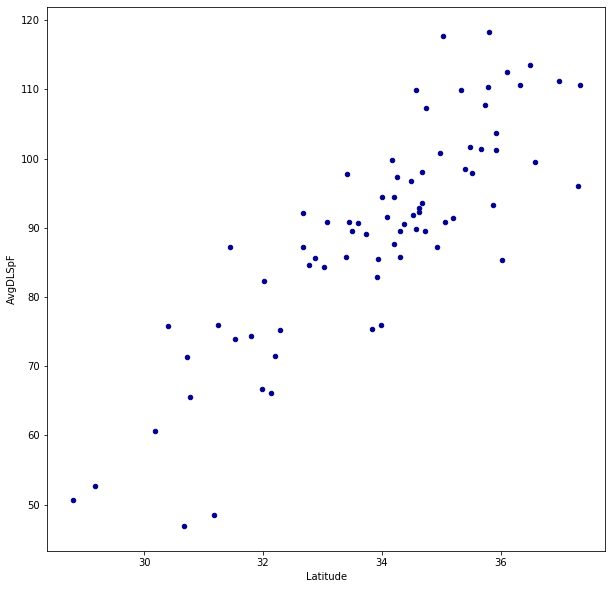

In [2]:
ax1 = sdf.plot.scatter(x="Latitude",y="AvgDLSpF",c='DarkBlue', figsize=(10,10)) 

In [3]:
r, pvalue = stats.pearsonr(sdf["Latitude"], sdf["AvgDLSpF"])
print("r:", r)
print("pvalue:", pvalue)

r: 0.8516119311747599
pvalue: 1.8818596982040622e-22


slope: 7.1097165992358775
intercept: -151.66254853127128


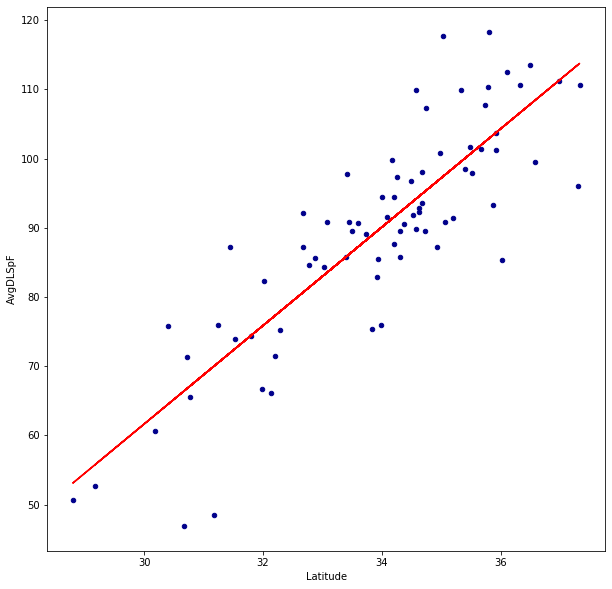

In [4]:
ax1 = sdf.plot.scatter(x="Latitude",y="AvgDLSpF",c='DarkBlue', figsize=(10,10)) 
x = sdf.Latitude
y = sdf.AvgDLSpF

regressStats = stats.linregress(x, y)
slope = regressStats.slope
intercept = regressStats.intercept
print("slope:", slope)
print("intercept:", intercept)
plt.plot(x, slope * x + intercept, color="red")

In [5]:
regressStats

LinregressResult(slope=7.1097165992358775, intercept=-151.66254853127128, rvalue=0.85161193117476, pvalue=1.8818596982040295e-22, stderr=0.5087087047885179)

In [6]:
rsq = regressStats.rvalue**2
print("R-squared: %f" % rsq)

R-squared: 0.725243


In [8]:
sdf['modeled_AvgDLSpF_from_Lat'] = sdf["Latitude"] * slope + intercept
sdf['residual_AvgDLSpF_from_Lat'] = (sdf['modeled_AvgDLSpF_from_Lat'] - sdf['AvgDLSpF'])**2
sdf

,Station,AvgDLSpF,Latitude,modeled_AvgDLSpF_from_Lat,residual_AvgDLSpF_from_Lat
0,"Edenton, NC",85.27,36.02,104.429443,367.084270
1,"Hopewell, VA",96.00,37.30,113.529881,307.296715
2,"Tarboro, NC",93.22,35.88,103.434083,104.327493
3,"Kinston, NC",91.44,35.20,98.599476,51.258093
4,"Southport, NC",82.85,33.92,89.499039,44.209713
...,...,...,...,...,...
71,"Troy, AL",74.41,31.80,74.426439,0.000270
72,"Scottsboro, AL",98.02,34.67,94.831326,10.167642
73,"De Funiak Springs, FL",71.33,30.72,66.747945,20.995224
74,"Talladega, AL",97.83,33.42,85.944180,141.272712


In [9]:
SE = (sdf['residual_AvgDLSpF_from_Lat'].sum()/ (sdf['residual_AvgDLSpF_from_Lat'].count() - 2))**0.5
print(SE)

8.339245582509802


In [10]:
Fstat = rsq * (sdf['residual_AvgDLSpF_from_Lat'].count() - 2) / (1 - rsq)
Fstat

195.328781562784

In [11]:
pvalueSLR = 1 - stats.f.cdf(Fstat, 1, 74)
pvalueSLR

1.1102230246251565e-16